In [1]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
iris = datasets.load_iris()



Automatically created module for IPython interactive environment


In [21]:
X = iris.data

In [32]:
# Some noisy data not correlated
E = np.random.uniform(0, 1.5, size=(len(iris.data), 50))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))


plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])


In [28]:
X.shape

(150, 24)

In [33]:
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# Init classifier
classifiers = [linear_model.LogisticRegression(),svm.SVC(kernel='linear'), KNeighborsClassifier(), QuadraticDiscriminantAnalysis(), LinearDiscriminantAnalysis(solver="lsqr")]
names = ["Logistic Regression", "Support Vector Machines", "K Nearest Neighbors", "Quadratic Discrim Analysis", "Linear Discrim Analysis"]

# Split data -> 2/3 for learning & 1/3 for validation
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.75, random_state=0)

for clf,name in zip(classifiers,names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
    error = accuracy_score(y_test, y_pred) # Compute the overall accuracy
    print('Errors for {1}: \t {0:.2f}'.format(error,name)) # \t means "tabular" space, and {0:.2f} 
                                                           # means we print only two first decimal

Errors for Logistic Regression: 	 0.80
Errors for Support Vector Machines: 	 0.90
Errors for K Nearest Neighbors: 	 0.84
Errors for Quadratic Discrim Analysis: 	 0.60
Errors for Linear Discrim Analysis: 	 0.34


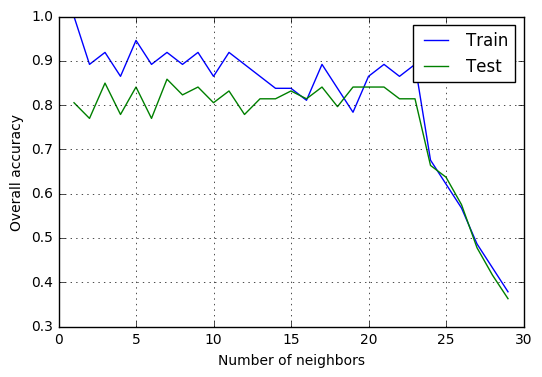

In [34]:
neighbors = sp.arange(1,30)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    errors_validation.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors,errors_train)
plt.plot(neighbors,errors_validation)
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Overall accuracy")
plt.grid()